<div style="border:2px solid #000; padding:10px; display: inline-block;font-size: big;"> <b>scRNA Sequencing Analysis of Influenza A infection in Murine Immune Cells </div>

<div style="border:1px solid #000; padding:10px; display: inline-block;">
        <ul>
            <li><b>GSM2884119 CD45+ PBS-treated</b></li>
            <li><b>GSM2884125 CD45+ 72h</b></li>
        

  *Cells derived from the lungs of influenza-treated and PBS treated mice. </span>


<div style="border:1px solid #000; padding:10px; display: inline-block;"> LIBRARIES </div>

In [1]:
import scanpy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
Global seed set to 0
/home/exouser/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .au

<div style="border:1px solid #000; padding:10px; display: inline-block;"> DATA </div>

In [2]:
# IMMUNE CELLS AFTER HRS (first)
#! DONT FORGET: scanpy requires transverse data (flip x, y)
df = sp.read_text("GSM2884125_Flu_treated_CD45p_72h_umis.txt.gz").T
df

AnnData object with n_obs × n_vars = 768 × 34032

In [3]:
# GENES
print(f'GENES {df.obs.shape}\n{df.obs.head(10)}\n\nCELLS {df.var.shape}\n{df.var.head(10)}\n\nCOUNTS {df.X.shape}\n{df.X}')


GENES (768, 0)
Empty DataFrame
Columns: []
Index: [W199121, W199122, W199123, W199124, W199125, W199126, W199127, W199128, W199129, W199130]

CELLS (34032, 0)
Empty DataFrame
Columns: []
Index: [0610005C13Rik, 0610007C21Rik, 0610007L01Rik, 0610007P08Rik, 0610007P14Rik, 0610007P22Rik, 0610008F07Rik, 0610009B14Rik, 0610009B22Rik, 0610009D07Rik]

COUNTS (768, 34032)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<p><div style="border:1px solid #000; padding:10px; display: inline-block;"> PRE-PROCESS </div>

In [4]:
 # MITOCHONDRIAL GENE CHECK: CLEAN
df.var['mt'] = df.var.index.str.startswith('mt-')

# RIBOSOMAL GENE CHECK
url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&filetype=txt" #ribo gene list
ribo_genes = pd.read_table( url, skiprows = 2, header=None)
df.var['ribo'] = df.var_names.isin( ribo_genes[0].values ) # 0 because var_names has array[array[]]


df.var

,mt,ribo
0610005C13Rik,False,False
0610007C21Rik,False,False
0610007L01Rik,False,False
0610007P08Rik,False,False
0610007P14Rik,False,False
...,...,...
snoZ159,False,False
snoZ178,False,False
snoZ39,False,False
snoZ40,False,False


In [5]:
#DEVELOP SUMMARY STATS THAT INCLUDE OUR MT AND RIBO BOOLEAN
sp.pp.calculate_qc_metrics(df, qc_vars = ['mt', 'ribo'], percent_top = None, log1p = False, inplace = True)

# Looking clean
df.obs 

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
W199121,439,853.0,96.0,11.254396,0.0,0.0
W199122,1566,3850.0,373.0,9.688312,0.0,0.0
W199123,749,1719.0,231.0,13.438046,0.0,0.0
W199124,736,1407.0,164.0,11.656006,0.0,0.0
W199125,293,523.0,21.0,4.015296,0.0,0.0
...,...,...,...,...,...,...
W199884,1032,2296.0,361.0,15.722996,0.0,0.0
W199885,283,857.0,238.0,27.771294,0.0,0.0
W199886,413,789.0,114.0,14.448669,0.0,0.0
W199887,401,794.0,53.0,6.675063,0.0,0.0


In [6]:
# Check sample variable with additional statistics, sorted by count'
df.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
0610005C13Rik,False,False,0,0.000000,100.000000,0.0
Gm4887,False,False,0,0.000000,100.000000,0.0
Gm4886,False,False,0,0.000000,100.000000,0.0
Gm4885,False,False,0,0.000000,100.000000,0.0
Gm4884,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
ERCC-00096,False,False,753,17.830729,1.953125,13694.0
ERCC-00004,False,False,753,9.148438,1.953125,7026.0
ERCC-00074,False,False,755,21.451822,1.692708,16475.0
ERCC-00130,False,False,757,27.276041,1.432292,20948.0


<p><div style="border:1px solid #000; padding:10px; display: inline-block;"> HARD FILTER </div>
<blockquote> This particular data has been already cleared of doublets and ambiguous cells  with demuxlet<br>
    removal of any cell with < 200 unique genes, any cell expressiong >20%

In [7]:

# CHECK SHAPE
print(f'PRE: {df.shape}')

# REMOVE THOSE IN MINIMUM OF 10
sp.pp.filter_genes(df, min_cells = 10) # only because they
postgene = str(df.shape)
print(f'POST GENE FILTER: {postgene}')

# REMOVE CELLS WITH MIN
sp.pp.filter_cells(df, min_genes = 10)
postcell = str(df.shape)
print(f'POST CELL FILTER: {postcell}')

# SORT BY COUNT
df.var.sort_values('n_cells_by_counts')

PRE: (768, 34032)
POST GENE FILTER: (768, 7156)
POST CELL FILTER: (768, 7156)


,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
Rcbtb1,False,False,10,0.015625,98.697917,12.0,10
Mavs,False,False,10,0.016927,98.697917,13.0,10
Mau2,False,False,10,0.016927,98.697917,13.0,10
Rnf103,False,False,10,0.013021,98.697917,10.0,10
Rnd1,False,False,10,0.014323,98.697917,11.0,10
...,...,...,...,...,...,...,...
ERCC-00096,False,False,753,17.830729,1.953125,13694.0,753
ERCC-00004,False,False,753,9.148438,1.953125,7026.0,753
ERCC-00074,False,False,755,21.451822,1.692708,16475.0,755
ERCC-00130,False,False,757,27.276041,1.432292,20948.0,757


<div style="border:1px dashed #000; padding:10px; display: inline-block;"> mito + ribo -</div>

<p><div style="border:1px solid #000; padding:10px; display: inline-block;"> PLOTS! </div>
<blockuote> looking at cell distribution via unqiue genes

98th PERCENTILE n_genes_by_counts: 1440.28
CELLS CONTAINING RIBO GENES: 0
CELLS CONTAINING MITO GENES: 758


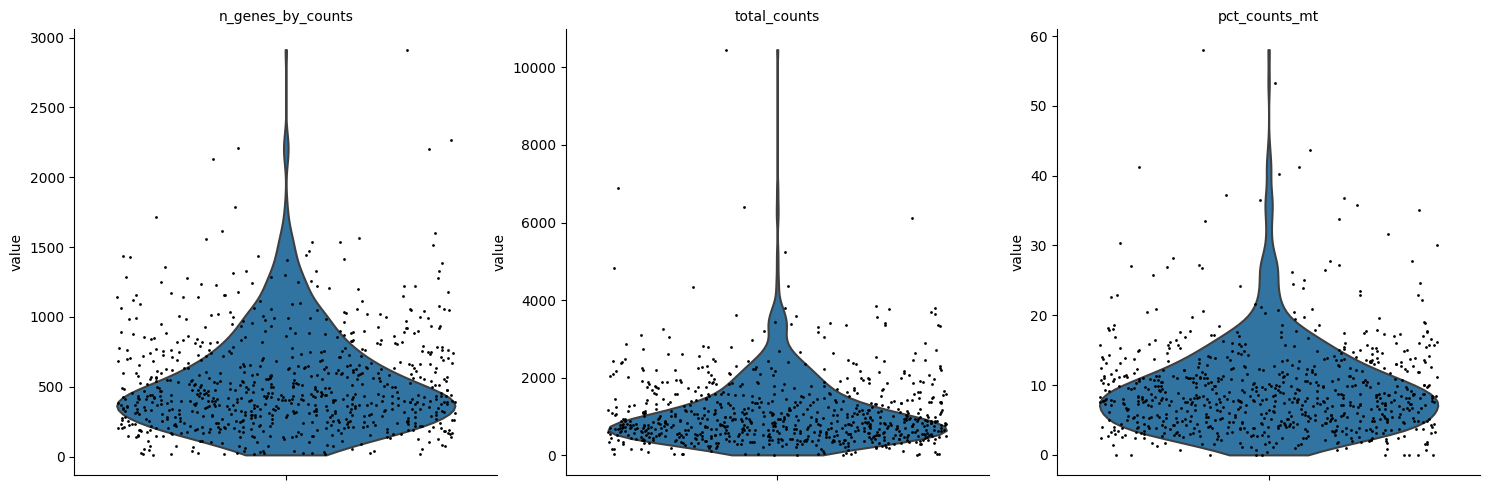

In [8]:
#VIOLIN PLOTS

upper = np.quantile(df.obs.n_genes_by_counts.values, .98)
num_genes_ribo = df.obs['total_counts_ribo'].astype(bool).sum()
num_genes_mito = df.obs['total_counts_mt'].astype(bool).sum()
print(f'98th PERCENTILE n_genes_by_counts: {round(upper, 2)}\nCELLS CONTAINING RIBO GENES: {num_genes_ribo}\nCELLS CONTAINING MITO GENES: {num_genes_mito}')

sp.pl.violin(df, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter = 0.4, size = 2, multi_panel =  True)





<p><div style="border:1px solid #000; padding:10px; display: inline-block;"> NORMALIZE </div>
<blockquote>  We want to normalize the counts in each cell so that their total counts adds up to the same value.

In [9]:
def normalize( df ): 
    
    # FOR SANITY: .copy() 
    before = df.X.sum(axis=1).copy()
    print(f'BEFORE:\nmin {min(before)}, median {np.median(before)}, max {round(max(before),2)}\n{before[:10]}')
    
    # NORMALIZE!
    sp.pp.normalize_total(df, target_sum = 1e4)
    
    # CHYES.
    after = df.X.sum(axis=1).copy()
    print(f'\nAFTER:\nmin {min(after)}, median {np.median(after)}, max {round(max(after),2)}\n{after[:10]}')
    
    # AND LOG COUNTS
    sp.pp.log1p( df )
    loggins = df.X.sum(axis=1).copy()
    print(f'\nLOG:\nmin {min(loggins)}, median {np.median(loggins)}, max {round(max(loggins),2)}\n{loggins[:10]}')

    return df

df = normalize( df )

BEFORE:
min 14.0, median 841.5, max 10140.0
[ 827. 3698. 1655. 1354.  503.  721. 1851.  237. 1332. 3369.]

AFTER:
min 9999.998046875, median 10000.0, max 10000.0
[10000.    10000.    10000.    10000.    10000.    10000.001 10000.
 10000.    10000.    10000.   ]

LOG:
min 80.257080078125, median 1199.18408203125, max 3207.110107421875
[1195.3799  2530.2432  1669.0386  1676.9572   916.91455 1127.286
 2012.7921   500.4101  1610.7479  2323.5913 ]


In [10]:
# SavePoint: df into the .raw slot of df to preserve state
df.raw = df.copy()

<p><div style="border:1px solid #000; padding:10px; display: inline-block;"> Clustering </div>
<blockquote>  We could filter highly variable genes, but first lets try raw with this gene set.
<br> Our gene set is so small we will run the entire 384 genes and assess the noise.
<br> If we were to run it, checking df.var would show wheather a gene is classified as appropriate 'dispersion' to be considered variable, with regard to n_top_genes in the pp.high_variable_genes step

In [11]:
# sp.pp.highly_variable_genes(df, n_top_genes = 2000)
# sp.pl.highly_variable_genes(df)
df.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
0610007C21Rik,False,False,24,0.039062,96.875000,30.0,24
0610007L01Rik,False,False,47,0.091146,93.880208,70.0,47
0610007P14Rik,False,False,11,0.014323,98.567708,11.0,11
0610009B22Rik,False,False,11,0.016927,98.567708,13.0,11
0610009D07Rik,False,False,78,0.114583,89.843750,88.0,78
...,...,...,...,...,...,...,...
mt-Rnr2,True,False,752,64.222656,2.083333,49323.0,752
mt-Ti,True,False,17,0.023438,97.786458,18.0,17
mt-Tl1,True,False,284,0.627604,63.020833,482.0,284
mt-Tt,True,False,333,0.843750,56.640625,648.0,333


In [12]:
df.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes
W199121,439,853.0,96.0,11.254396,0.0,0.0,415
W199122,1566,3850.0,373.0,9.688312,0.0,0.0,1444
W199123,749,1719.0,231.0,13.438046,0.0,0.0,696
W199124,736,1407.0,164.0,11.656006,0.0,0.0,692
W199125,293,523.0,21.0,4.015296,0.0,0.0,276
...,...,...,...,...,...,...,...
W199884,1032,2296.0,361.0,15.722996,0.0,0.0,942
W199885,283,857.0,238.0,27.771294,0.0,0.0,263
W199886,413,789.0,114.0,14.448669,0.0,0.0,390
W199887,401,794.0,53.0,6.675063,0.0,0.0,373


In [13]:
# NaN CHECK
def nonsense_clear( df ):
    
    #Check for NaN values
    print(df.obs[['total_counts', 'pct_counts_mt', 'pct_counts_ribo']].isnull().sum())
    print()
    # Check for Inf values
    print((df.obs[['total_counts', 'pct_counts_mt', 'pct_counts_ribo']] == float('inf')).sum())
    
nonsense_clear( df )

total_counts       0
pct_counts_mt      0
pct_counts_ribo    0
dtype: int64

total_counts       0
pct_counts_mt      0
pct_counts_ribo    0
dtype: int64


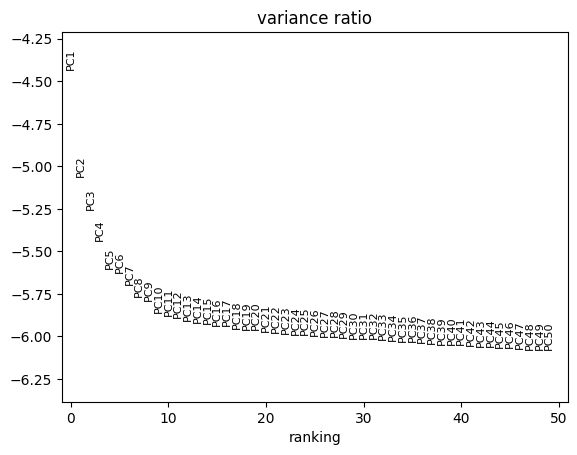

In [14]:

# df = df[:, df.var.highly_variable]
# df.shape

def pca_check( df ):
    
    # REGRESS the differences that arise due to total count. 
    sp.pp.regress_out(df,['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])
    
    
    # SCALE data.
    # Normalize each gene to the 'unit-variance' of that gene.
    sp.pp.scale(df, max_value = 10)
    
    # PRINCIPAL COMPONENT ANALYSIS
    # further reduce dimensions of the data
    # default is 50pcs
    # 'arpack' 'uses an iterative approach to compute a subset of the principal components. large datasets.
    sp.tl.pca(df, svd_solver = 'arpack') # n_comps
    
    # Plot hopw much the principal components contribute
    sp.pl.pca_variance_ratio(df, log = True, n_pcs = 50)

pca_check( df )

/home/exouser/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/exouser/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/exouser/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning:

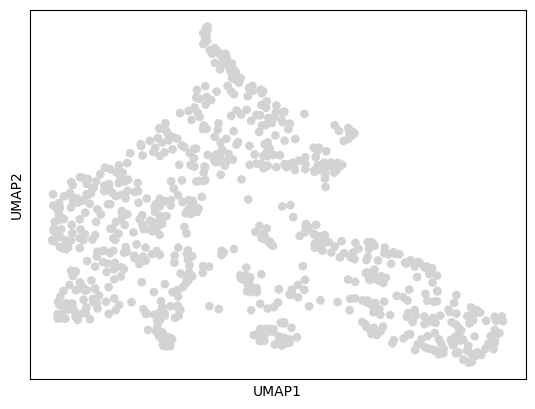

In [15]:

# NEIGHBORS!
sp.pp.neighbors(df, n_pcs = 9) #  n_neighbors = 30

# UMAP PROCESS
sp.tl.umap(df, min_dist = .3) # min_dist = 0.3

# UMAP PLOT
sp.pl.umap(df)



In [16]:
# APPLY leiden, petition according to gene expression profiles
sp.tl.leiden(df, resolution = .7)

# Check leiden values
df.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,leiden
W199121,439,853.0,96.0,11.254396,0.0,0.0,415,4
W199122,1566,3850.0,373.0,9.688312,0.0,0.0,1444,7
W199123,749,1719.0,231.0,13.438046,0.0,0.0,696,3
W199124,736,1407.0,164.0,11.656006,0.0,0.0,692,0
W199125,293,523.0,21.0,4.015296,0.0,0.0,276,6
...,...,...,...,...,...,...,...,...
W199884,1032,2296.0,361.0,15.722996,0.0,0.0,942,3
W199885,283,857.0,238.0,27.771294,0.0,0.0,263,2
W199886,413,789.0,114.0,14.448669,0.0,0.0,390,5
W199887,401,794.0,53.0,6.675063,0.0,0.0,373,5


/home/exouser/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


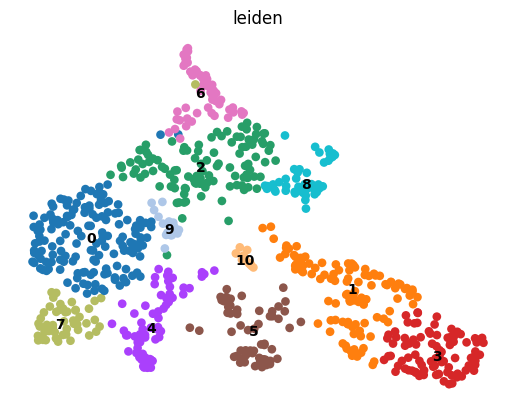

In [17]:
# PLOT WITH LEIDEN COLOR GROUPING!
# yay resolution!
sp.pl.umap(df, color = ['leiden'],
           frameon = False,
           legend_loc = "on data")

<p><div style="border:1px solid #000; padding:10px; height: auto; width: 200px;"> PART 2 (..fresh data)</div>
<p><div style="border:1px solid #000; padding:10px; display: inline-block;"> INTEGRATE </div>
<blockquote>  This is where we could create a function and run the previous on all sample types, and integrate


In [18]:
def preprocess( file, name ):

    df = sp.read_text( file ).T
    df.obs['Sample'] = name
    
    #FILTER
    sp.pp.filter_genes(df, min_cells = 10)
    sp.pp.filter_cells(df, min_genes = 10)
    # sp.pp.highly_favorable_genes(df, n_top_genes = 200, subset = True, flavor = 'seurat_v3')
    
    # MITOCHONDRIAL GENE CHECK: CLEAN
    df.var['mt'] = df.var.index.str.startswith('mt-')
    
    # RIBOSOMAL GENE CHECK
    url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&filetype=txt" #ribo gene list
    ribo_genes = pd.read_table( url, skiprows = 2, header=None)
    df.var['ribo'] = df.var_names.isin( ribo_genes[0].values ) # 0 because var_names has array[array[]]
    
    #DEVELOP SUMMARY STATS THAT INCLUDE OUR MT AND RIBO BOOLEAN
    sp.pp.calculate_qc_metrics(df, qc_vars = ['mt', 'ribo'], percent_top = None, log1p = False, inplace = True)
    
    upper_lim = np.quantile(df.obs.n_genes_by_counts.values, .98)
    df = df[df.obs.n_genes_by_counts < upper_lim]
    df = df[df.obs.pct_counts_mt < 20]
    df = df[df.obs.pct_counts_ribo < 2]
    
    return df

In [19]:
# Giving everyone clean treatment


viral = preprocess("GSM2884125_Flu_treated_CD45p_72h_umis.txt.gz", "viral")
control = preprocess("GSM2884119_PBS_CD45p_treated_umis.txt.gz", "control")
df_cv = sp.concat([viral, control])
df_cv


AnnData object with n_obs × n_vars = 1279 × 6823
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'

In [20]:
df_cv.obs.groupby('Sample').count()


,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,
control,578,578,578,578,578,578,578
viral,701,701,701,701,701,701,701


<blockquote> Normalize<br>NaN Check<br>Regress<br>Neighbors!<br>UMAP

BEFORE:
min 13.0, median 963.0, max 4641.0
[ 819. 1649. 1316.  498.  716. 1836.  235. 1315. 3337. 1294.]

AFTER:
min 9999.998046875, median 10000.0, max 10000.0
[10000.    10000.    10000.     9999.999 10000.    10000.    10000.
 10000.    10000.    10000.   ]

LOG:
min 80.257080078125, median 1221.124755859375, max 2493.909912109375
[1180.4392 1659.5713 1635.9493  904.3189 1116.2332 1993.8973  496.9846
 1586.5734 2301.0117 1218.8123]

total_counts       0
pct_counts_mt      0
pct_counts_ribo    0
dtype: int64

total_counts       0
pct_counts_mt      0
pct_counts_ribo    0
dtype: int64


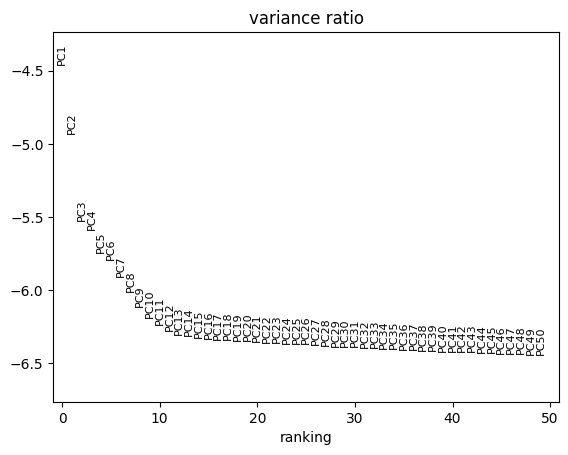

In [21]:
# Normalize
df_cv = normalize( df_cv )

print()

# NaN Check
nonsense_clear( df_cv )

# PCA!
pca_check( df_cv )

/home/exouser/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


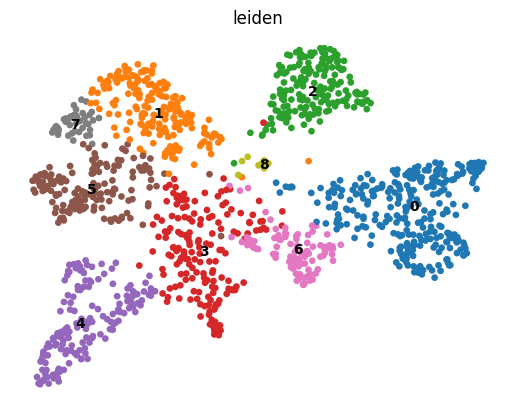

In [22]:
# NEIGHBORS

# NEIGHBORS!
sp.pp.neighbors(df_cv, n_pcs = 15) #  n_neighbors = 30

# UMAP PROCESS
sp.tl.umap(df_cv, min_dist = .3) # min_dist = 0.3

# APPLY leiden, petition according to gene expression profiles
sp.tl.leiden(df_cv, resolution = .6)

# yay resolution!
sp.pl.umap(df_cv, color = ['leiden'],
          frameon = False,
           legend_loc = "on data")

<p><div style="border:1px solid #000; padding:10px; display: inline-block;"> <CENTER>LABEL! </CENTER><br>(Find Markers) </div>
<blockquote>  Scope Top20 from each cluster 
    <br> Establish rank_gene groups table
    <br> Filter based on P-Value

/home/exouser/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/exouser/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/exouser/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/exouser/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/exouser/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/exouser/.local/lib/pytho

Top 20 in Each Group


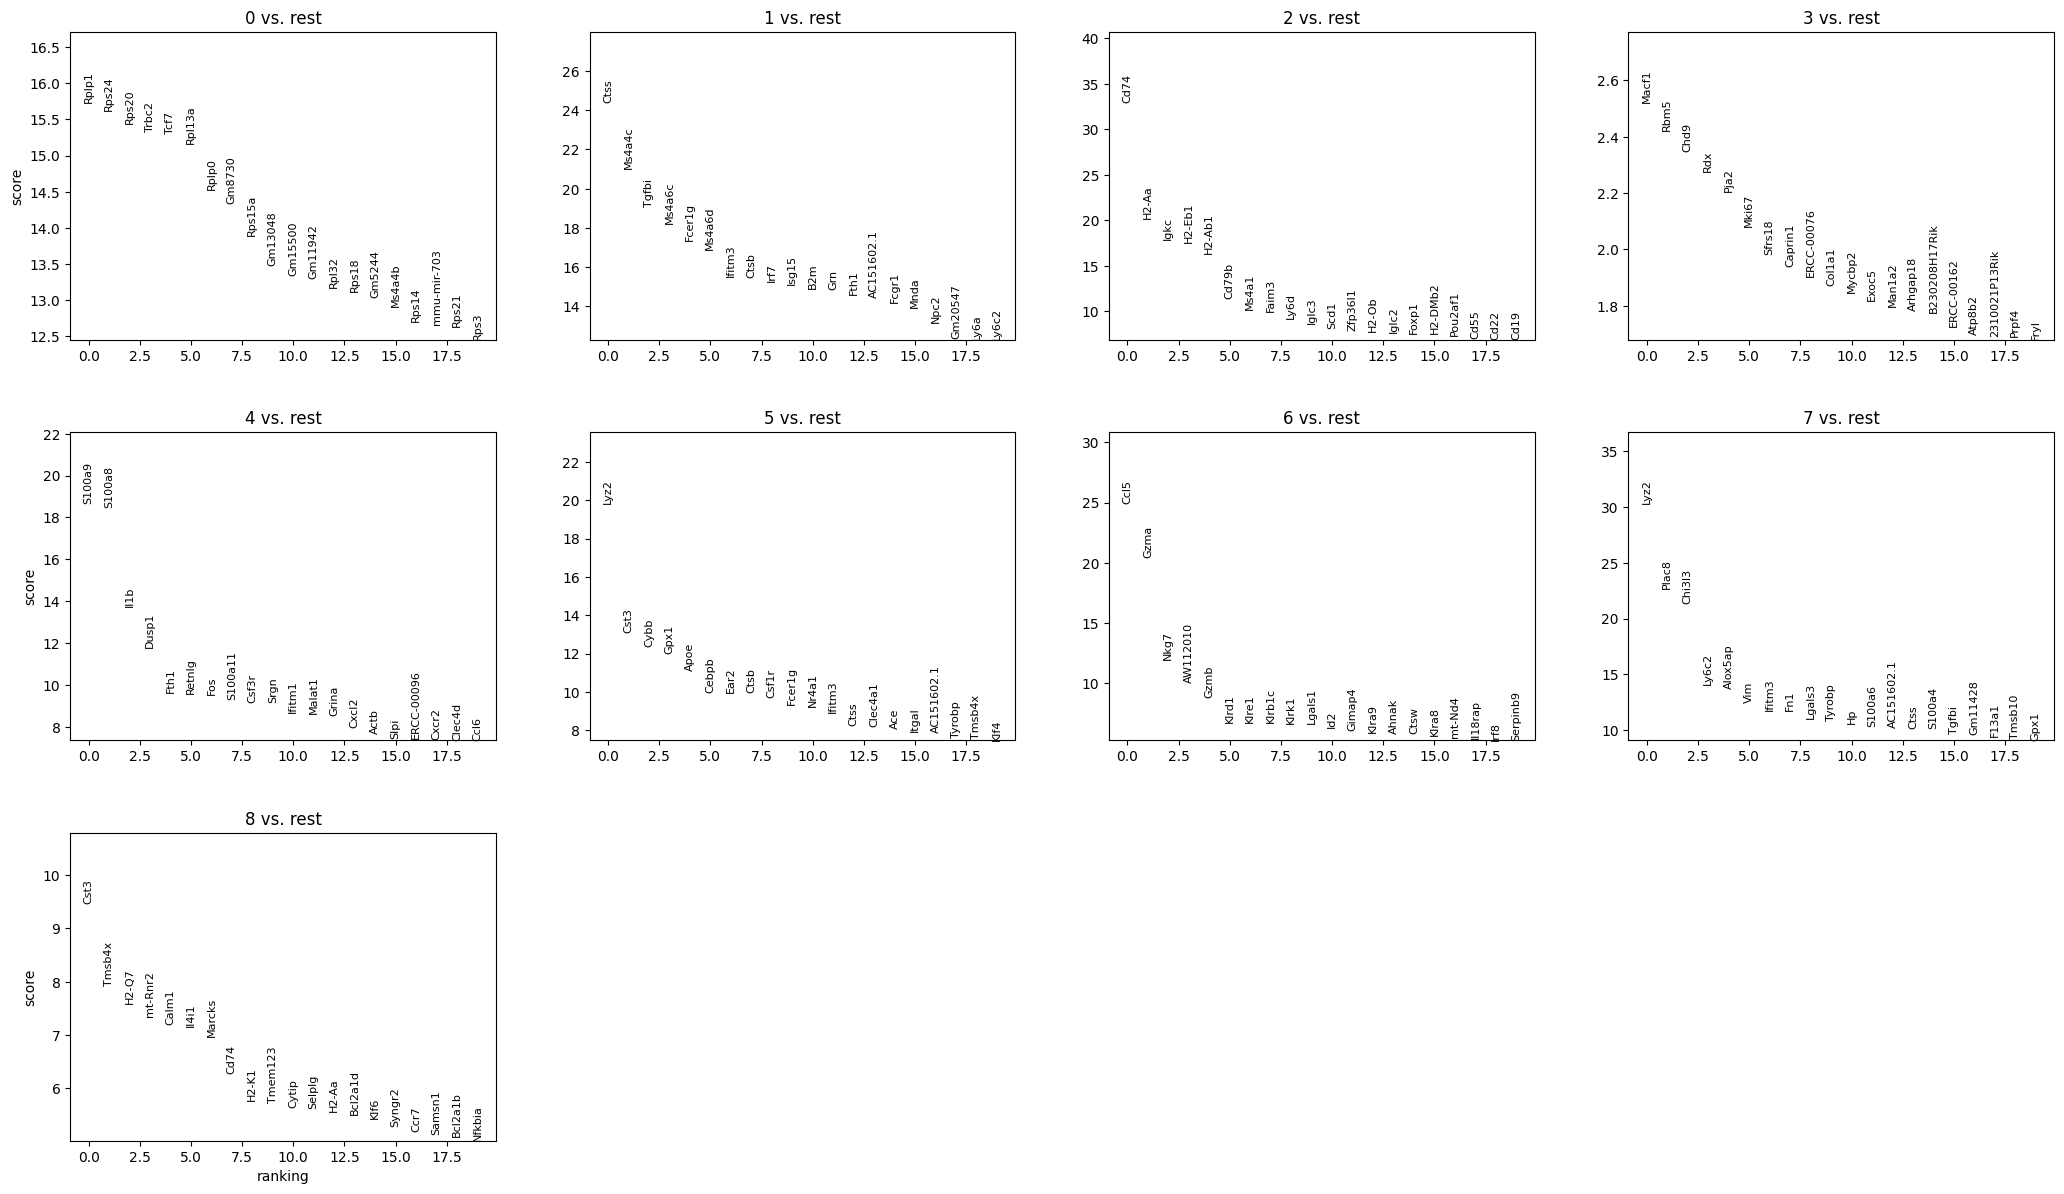

TOP 20 OVERALL


/home/exouser/.local/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


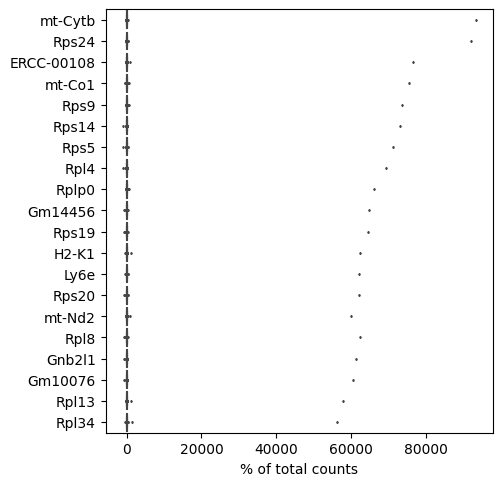

In [23]:

def top20( df ):
    sp.tl.rank_genes_groups(df, 'leiden')
    
    # SCOPING Top 20 genes from each group.
    print('Top 20 in Each Group')
    sp.pl.rank_genes_groups(df_cv, n_genes = 20, sharey = False)
    
    #Top20 period
    print('TOP 20 OVERALL')
    sp.pl.highest_expr_genes(df_cv, n_top = 20, )

top20( df_cv )

def markers( df ):

    #RANKING TABLE
    # 'GROUP' equals the leiden cluster
    markers = sp.get.rank_genes_groups_df(df, None)
    # print(markers)
    
    # SAVE FILTERED
    markers = markers[ (markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5) ]
    
    return markers

markers = markers( df_cv )

<p><div style="border:1px solid #000; padding:10px; display: inline-block;"> CLUSTER ID </div>
<blockquote> with the help of panglaodb!
    <br> Pull the top 20, and see about, hopefully, a particular cell type being in greater porportion

In [31]:
# Load PanglaoDB
panglao_db = pd.read_csv('PanglaoDB_markers_27_Mar_2020.tsv.gz', sep='\t')

def find_cell_types(genes):
# Filter PanglaoDB for rows where 'official gene symbol' is in genes
    rows = panglao_db[panglao_db['official gene symbol'].isin(genes)]
                
 # Return the unique cell types associated with these rows
    return rows['cell type'].unique()
                    
def top_genes_per_cluster(markers):
    all_clusters = markers['group'].unique()
    top_genes = {}
                                    
    for cluster in all_clusters:
        genes = markers.loc[markers['group'] == cluster, 'names'].tolist()
        cell_types = find_cell_types(genes)
        top_genes[cluster] = {'genes': genes, 'cell_types': cell_types}
                                                                
    return top_genes
                                                            
top_genes = top_genes_per_cluster(markers)

In [32]:
top_genes

{'4': {'genes': ['Dnlz', 'Slc37a4', 'Med27', 'Tdp1', 'Heatr5a', 'Med23'],
  'cell_types': array([], dtype=object)},
 '5': {'genes': ['Sec23a', 'Med23', 'Gm11945'],
  'cell_types': array([], dtype=object)},
 '6': {'genes': ['Ncdn',
   '4930506M07Rik',
   'D930014E17Rik',
   'S100a1',
   '2010002M12Rik',
   '2310061I04Rik',
   'Scnm1',
   '1110058L19Rik',
   'Slc37a4',
   'Heatr5a',
   'Tssc1',
   'Cyb561d2',
   'Mfn2',
   'Snapc3',
   'Gpn1',
   'Armc3',
   'Tdp1',
   'Sip1',
   'Dhfr',
   'Matk',
   'Dclre1b',
   'Timeless',
   'Gm13212',
   'Mudeng',
   'Adk',
   'Fech',
   'Cdc25a',
   'Sit1',
   'Coq6',
   'Cxcl12',
   'Pelp1',
   'Pcca',
   'Rdh11',
   'Gm12270',
   'Mrc1'],
  'cell_types': array([], dtype=object)},
 '7': {'genes': ['Creb5',
   'Sec23a',
   'Ngrn',
   'Med23',
   'Gm10093',
   '2010002M12Rik',
   'Pelp1',
   'Ciapin1',
   'Ankrd33b',
   'Ring1',
   'Tmem85',
   'Bgn',
   'Hmgn2',
   'Dhfr',
   'Sac3d1',
   'Rdh11',
   'Ubl7',
   'Dmxl2',
   'Rps2-ps13',
   'Armc7',